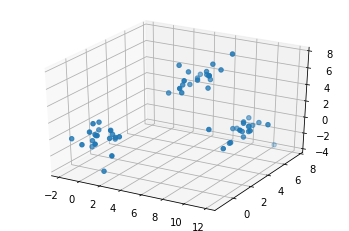

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성

k= 3

points = [np.random.randn(k) for _ in range(20)]
points.extend([np.random.randn(k) + np.array([5,5,5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10,5,0]) for _ in range(20)])
points = np.array(points)

fig = plt.figure()
ax = fig.gca(projection = '3d')

X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

ax.scatter(X,Y,Z)
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 5.1823981   5.06666317  5.02493684]
 [ 0.45612409 -0.22850354 -0.2234078 ]
 [ 9.86309997  4.70810888 -0.13134404]]


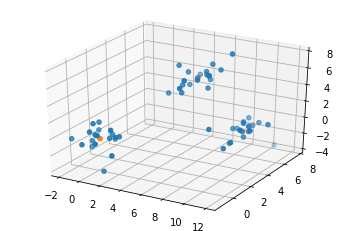

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(points)
print(kmeans.labels_) # 어떤 점에 속하는지. 총 점 개수 60
print(kmeans.cluster_centers_) # 어디가 센터인지

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2])
plt.show()

In [18]:
def euclidean_distance(a,b):
    return np.sum((a-b)**2) ** 0.5

In [52]:
def kmeans(points, k, max_iters = 30):
    '''# 1. cluster center를 랜덤하게 생성한다.
       # 2. 각각의 점들이 어떤 cluster center와 가장 가까운지 계산 및 할당 (label 계산)
       # 3. 새로운 label 을 이용해서, cluster center 새로 계산
       # 같은 클러스터에 속한 점들의 평균 구하기.
       # 4. 2-3 반복하다가 더이상 업데이트 없으면 종료'''
    
    #1
    cluster_centers = points[np.random.choice(points.shape[0], k, replace = False)]

    for iter in range(max_iters):
        #2
        labels = []
        for p in points:
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(cluster_centers):
                dist = euclidean_distance(p,c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
            labels.append(min_cid)
        labels = np.array(labels)

        #3
        new_cluster_centers = np.zeros_like(cluster_centers)
        counts = np.zeros(k)

        for l,p in zip(labels, points):
            new_cluster_centers[l] += p
            counts[l] += 1
        
        for i in range(k):
            new_cluster_centers[i] /= counts[i]

        print("iter: ", iter)

        #4
        if np.array_equal(cluster_centers, new_cluster_centers):
            break
        else:
            cluster_centers = new_cluster_centers

    return labels, cluster_centers

In [28]:
print(points.shape)

(60, 3)


iter:  0
iter:  1


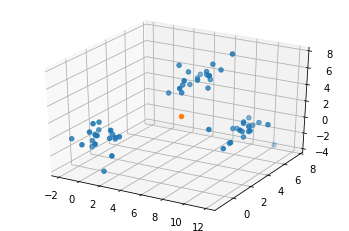

In [32]:
labels, cluster_centers = kmeans(points, k = 1)

fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2])
plt.show()

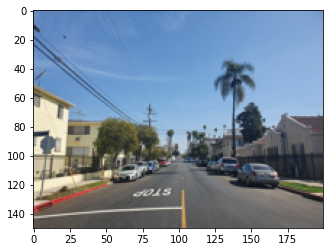

In [45]:
from PIL import Image

img= Image.open("laaa.jpg")

width = 200
height = img.height * width // img.width

img = img.resize((width, height))

plt.imshow(img)
plt.show()

iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
iter:  10
iter:  11
iter:  12
iter:  13
iter:  14
iter:  15
iter:  16
iter:  17
iter:  18
iter:  19
iter:  20
iter:  21
iter:  22
iter:  23
iter:  24
iter:  25
iter:  26
iter:  27
iter:  28
iter:  29


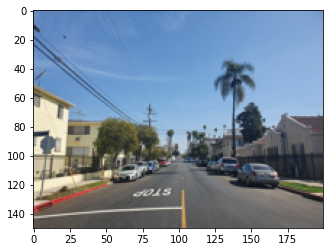

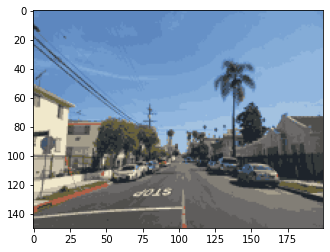

In [53]:
pixels = np.array(img).reshape(-1, 3).astype(np.float32)

'''구현함수'''
labels, cluster_centers = kmeans(pixels, 20)

# '''패키지'''
# kmeans = KMeans(n_clusters=10)
# kmeans.fit(pixels)
# labels = kmeans.labels_
# cluster_centers = kmeans.cluster_centers_

for l, i in zip(labels, range(pixels.shape[0])):
    pixels[i] = cluster_centers[l]

pixels = pixels.astype(np.uint8)

plt.imshow(img)
plt.show()

remasterd_img = Image.fromarray(pixels.reshape((height,width,3)), 'RGB')
plt.imshow(remasterd_img)
plt.show()